# Employee Performance and Retention Analysis

## Overview
 
This project focuses on analysing employee performance and retention patterns within an organisation. By leveraging HR data, the goal is to identify key factors influencing employee productivity, performance, and retention, and provide actionable insights for improving workforce efficiency, reducing turnover, and fostering a positive work environment. The project will employ data analysis techniques, including exploratory data analysis (EDA), trend analysis, and visualisation to help HR managers make data-driven decisions for workforce management. 

## Problem Statement
 
The objective of this project is to analyse HR data to assess employee performance, identify trends influencing retention, and provide recommendations for improving employee productivity and reducing turnover. 
#### Specifically, the project aims to: 
● Identify performance patterns based on factors such as age, education, department, and training. 
● Examine retention trends based on employee characteristics such as tenure, performance ratings, and awards. 
● Provide recommendations for improving employee engagement and retention strategies by analysing the relationship between key employee metrics. 

## Import Libraries and Load Data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style='whitegrid')

In [10]:
employees = pd.read_csv('employees_dataset.csv')

## 1. Exploratory Data Analysis (EDA)

### Dataset Overview

In [11]:
employees.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [17]:
employees.describe(include = 'all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17417.000000,17417,17417,16646,17417,17417,17417.000000,17417.000000,16054.000000,17417.000000,17417.000000,17417.000000,17417.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelors,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5458,3918,11519,12314,9751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39083.491129,NaN,NaN,NaN,NaN,NaN,1.250732,34.807774,3.345459,5.801860,0.358845,0.023368,63.176322
std,22707.024087,NaN,NaN,NaN,NaN,NaN,0.595692,7.694046,1.265386,4.175533,0.479675,0.151074,13.418179
min,3.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19281.000000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39122.000000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.000000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000


In [7]:
employees.dtypes

employee_id                int64
department                object
region                    object
education                 object
gender                    object
recruitment_channel       object
no_of_trainings            int64
age                        int64
previous_year_rating     float64
length_of_service          int64
KPIs_met_more_than_80      int64
awards_won                 int64
avg_training_score         int64
dtype: object

### Missing Values & Duplicates

In [19]:
employees.isnull().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [21]:
employees.duplicated().sum()

np.int64(2)

### Distribution of Key Numerical Variables

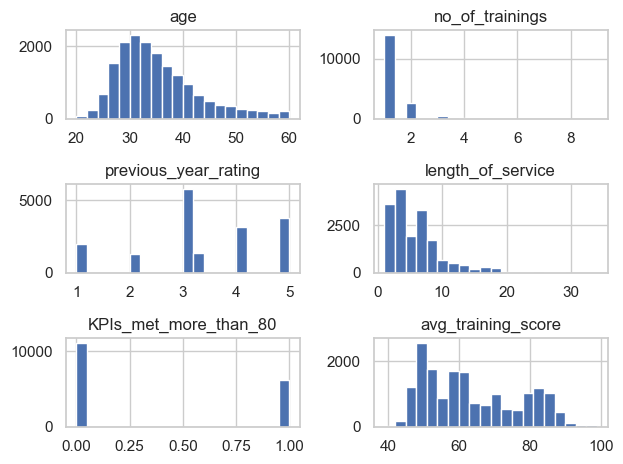

In [30]:
num_cols = ['age','no_of_trainings','previous_year_rating','length_of_service','KPIs_met_more_than_80','avg_training_score']
employees[num_cols].hist(bins=20, layout=(3,2))
plt.tight_layout()
plt.show()

### Categorical Variable Distribution

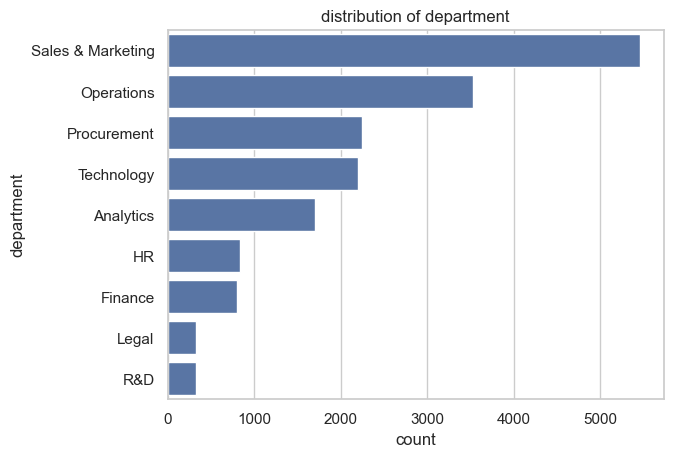

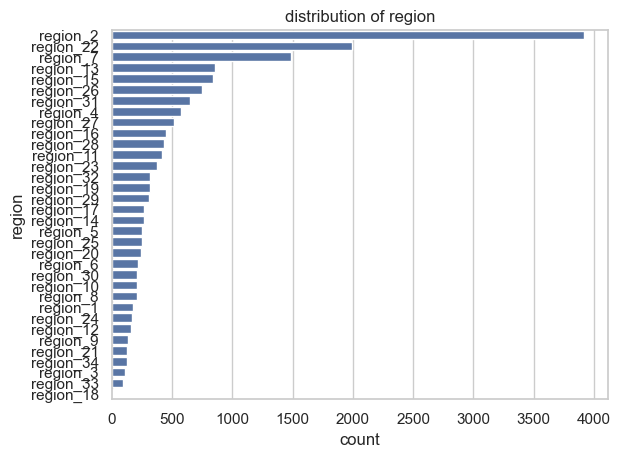

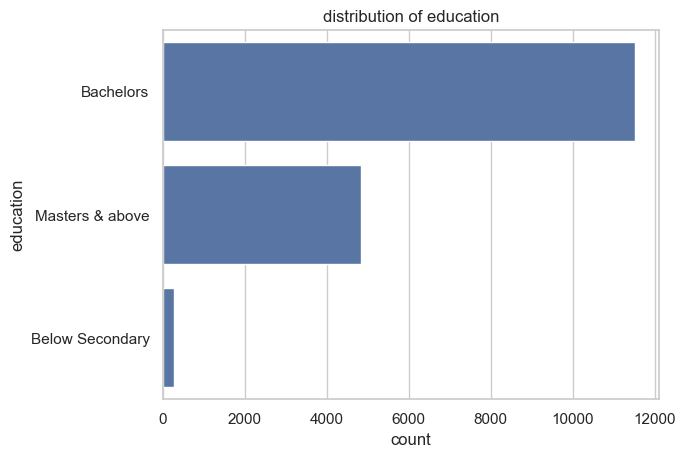

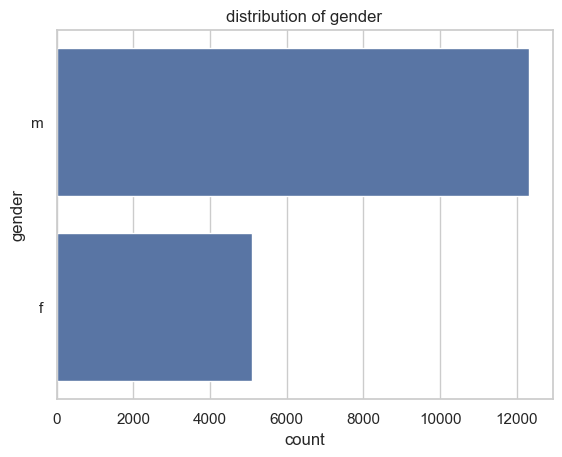

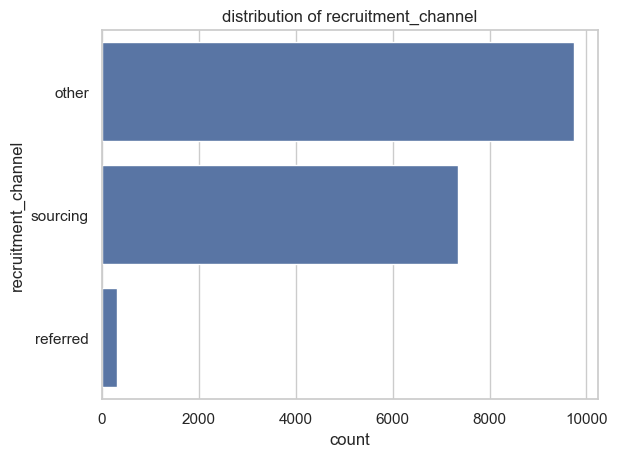

In [34]:
cat_cols = ['department','region','education','gender','recruitment_channel']

for col in cat_cols:
    sns.countplot(y = col, data = employees, order = employees[col].value_counts().index)
    plt.title(f"distribution of {col}")
    plt.show()

### Outlier Detection

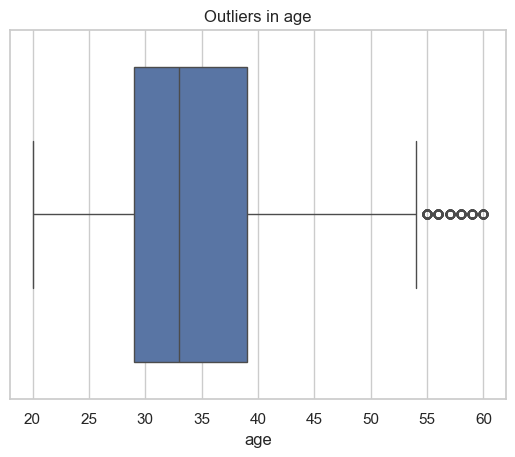

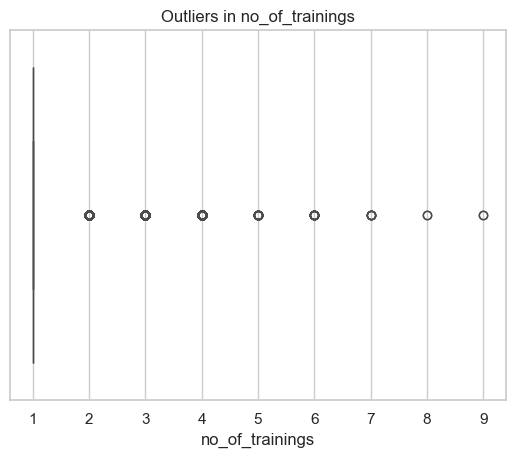

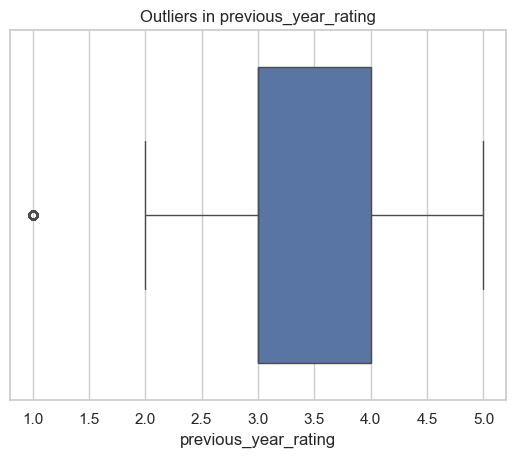

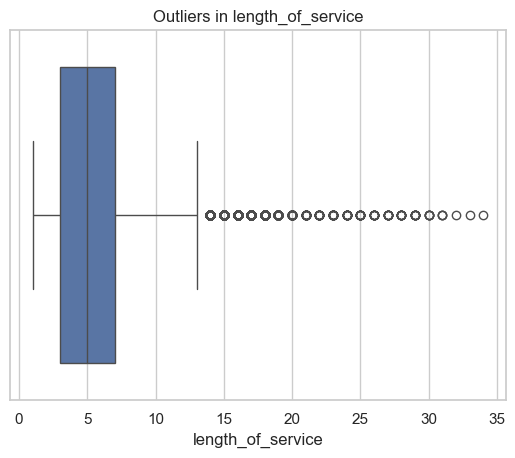

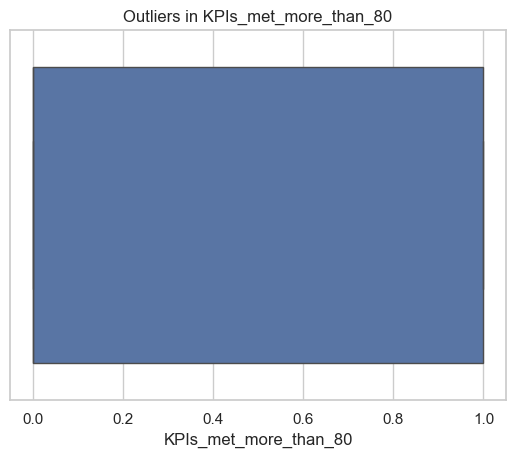

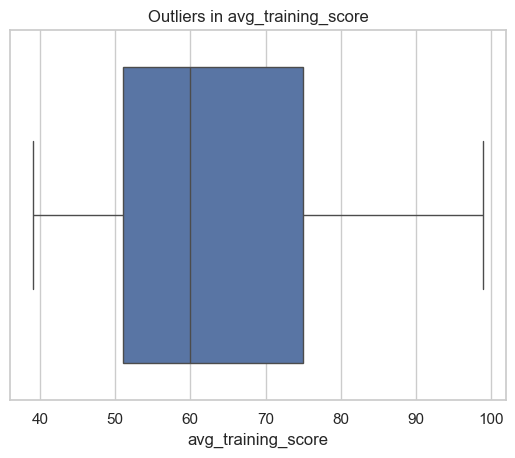

In [32]:
for col in num_cols:
    sns.boxplot(x = employees[col])
    plt.title(f'Outliers in {col}')
    plt.show()

## 2. Data Preprocessing

### Handling Missing Values

In [37]:
for col in num_cols:
    employees[col].fillna(employees[col].median(), inplace = True)

for col in cat_cols:
    employees[col].fillna(employees[col].mode()[0], inplace = True)

C:\Users\shwet\AppData\Local\Temp\ipykernel_21124\3960638058.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  employees[col].fillna(employees[col].median(), inplace = True)
C:\Users\shwet\AppData\Local\Temp\ipykernel_21124\3960638058.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

### Encoding Categorical Variables

In [42]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    employees[col + '_enc'] = le.fit_transform(employees[col])
    label_encoders[col] = le

### Final Dataset Check

In [43]:
employees.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met_more_than_80      0
awards_won                 0
avg_training_score         0
department_enc             0
region_enc                 0
education_enc              0
gender_enc                 0
recruitment_channel_enc    0
dtype: int64

## 3. Key Metrics Analysis

### Performance Metrics Summary

In [44]:
performance_metrics = employees [['KPIs_met_more_than_80','previous_year_rating','avg_training_score','awards_won']]

performance_metrics.describe()

,KPIs_met_more_than_80,previous_year_rating,avg_training_score,awards_won
count,17417.000000,17417.000000,17417.000000,17417.000000
mean,0.358845,3.345459,63.176322,0.023368
std,0.479675,1.214862,13.418179,0.151074
min,0.000000,1.000000,39.000000,0.000000
25%,0.000000,3.000000,51.000000,0.000000
50%,0.000000,3.000000,60.000000,0.000000
75%,1.000000,4.000000,75.000000,0.000000
max,1.000000,5.000000,99.000000,1.000000


### KPI Achievement vs Performance

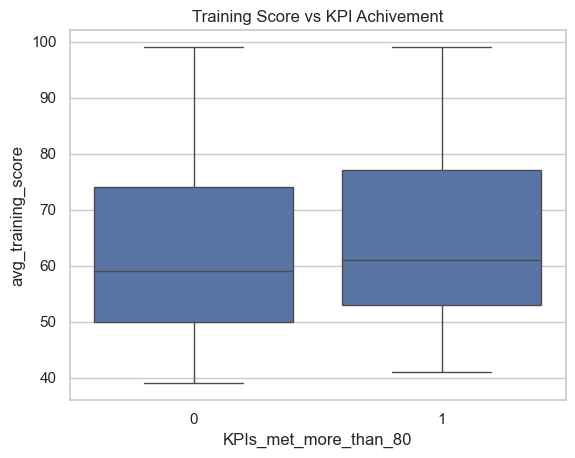

In [46]:
sns.boxplot(
    x = 'KPIs_met_more_than_80',
    y = 'avg_training_score',
    data = employees
)
plt.title("Training Score vs KPI Achivement")
plt.show()

### Awards Impact on Performance

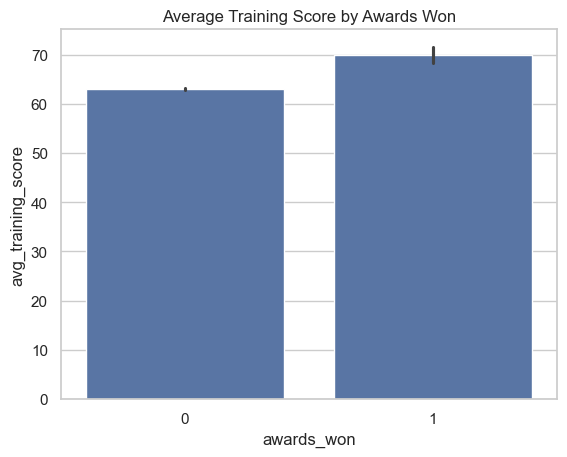

In [47]:
sns.barplot(
    x = 'awards_won',
    y = 'avg_training_score',
    data= employees
)
plt.title('Average Training Score by Awards Won')
plt.show()

### Length of Service Analysis

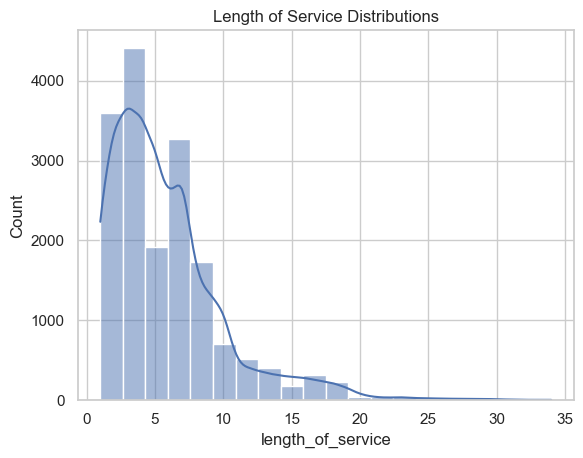

In [52]:
sns.histplot(employees['length_of_service'], bins = 20 , kde = True)
plt.title("Length of Service Distributions")
plt.show()

## 4. Retention Trends Analysis

#### Assumption: Longer length of service = higher retention

### Retention by Age Group

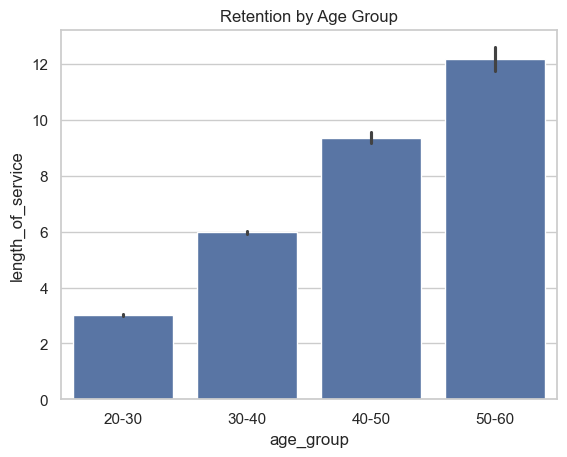

In [54]:

employees['age_group'] = pd.cut(
    employees['age'],
    bins = [20,30,40,50,60],
    labels = ['20-30','30-40','40-50','50-60']
)

sns.barplot(
    x = 'age_group',
    y = 'length_of_service',
    data = employees
)
plt.title('Retention by Age Group')
plt.show()


### Retention by Education

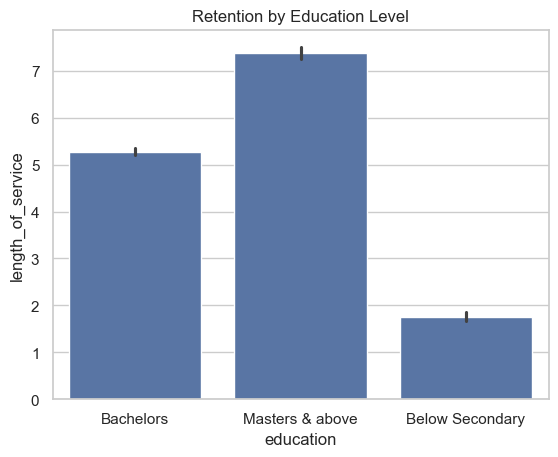

In [56]:
sns.barplot(
    x = 'education',
    y = 'length_of_service',
    data = employees
)
plt.title('Retention by Education Level')
plt.show()

### Retention by Department

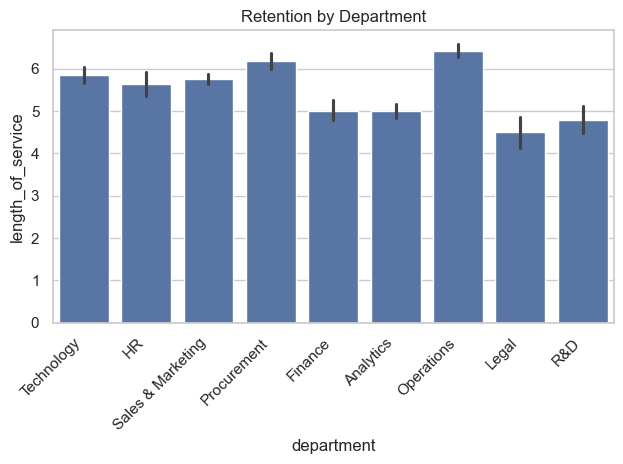

In [63]:
sns.barplot(
    x = 'department',
    y = 'length_of_service',
    data = employees
)
plt.title("Retention by Department")
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

### Training Impact on Retention

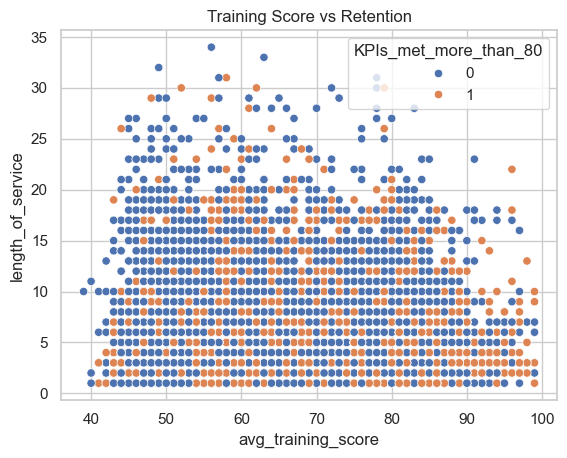

In [78]:
sns.scatterplot(
    x = 'avg_training_score',
    y = 'length_of_service',
    hue = 'KPIs_met_more_than_80',
    data = employees
)
plt.title('Training Score vs Retention')
plt.tight_layout
plt.show()

## 5. Predictive Insights & Actionable Recommendations

### Key Insights

Employees with higher training scores and KPI achievement show longer retention

Award-winning employees consistently outperform peers

Mid-career age groups (30–40) show the highest retention

Certain departments have shorter service lengths, indicating engagement gaps

Employees with lower previous year ratings are more likely to exit early

### Actionable HR Recommendations

1. Increase targeted training programs for low-performing departments.
   
2. Introduce recognition programs to improve motivation and retention.

3. Focus retention strategies on early-career employees (20–30 age group).

4. Use KPI performance as an early indicator for engagement interventions.

5. Invest in continuous learning for employees with high potential but low ratings.

## 6. Report

### Workforce Overview

Employees are mostly in the early to mid-career range (20–40 years).

Distribution across departments and regions varies, highlighting operational concentration risks.

Recruitment channels influence performance outcomes, indicating differences in candidate quality.

### Performance Insights

High training scores, KPI achievement, and awards strongly correlate with better performance.

Consistent performers continue to excel year-over-year.

Departments with lower performance may need targeted interventions.

### Retention Trends

High retention: Employees aged 30–40, award winners, and consistent KPI achievers.

Retention risk: Early-career employees (20–30), low KPI achievers, and employees in certain departments with shorter tenure.

Effective training and recognition directly improve retention.

### Conclusion:
Retention and performance are closely linked. By investing in skill development, recognition, and proactive performance management, the organization can enhance engagement, retain talent, and drive sustainable growth.

### Summary

Conducted EDA, preprocessing, and metric analysis

Identified key drivers of performance and retention

Visualized departmental, demographic, and training trends

Provided clear, interpretable insights for HR leadership

### Business Impact

Improved retention strategy alignment

Better performance management decisions

Data-driven workforce planning
